In [52]:
#pip install streamlit

In [53]:
#pip install plotly


In [54]:
import plotly.express as px

In [55]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [56]:
vaccinations = spark.read.load("./data/Vaccinations/", format="csv", header=True, inferSchema="True")
vaccinations.printSchema()

root
 |-- dep: string (nullable = true)
 |-- clage_vacsi: string (nullable = true)
 |-- jour: string (nullable = true)
 |-- n_dose1: string (nullable = true)
 |-- n_cum_dose1: string (nullable = true)



vaccinations.groupBy(["dep", "clage_vacsi"]).sum("n_dose1").sort(["dep", "clage_vacsi"]).take(100)

# Nombre de vaccinées par tranche d'âge

In [69]:
vacc = spark.read.load("./data/Vaccinations/vacsi-a-dep-2021-02-03-20h15.csv", format="csv", header=True, inferSchema="True")
newvacc = vacc.select(["clage_vacsi", "n_cum_dose1"])
nbVaccByAge = newvacc.where( newvacc.clage_vacsi != "0").groupBy("clage_vacsi").agg({"n_cum_dose1" : "max"}).sort(["clage_vacsi"])

#Sauvegarder les données récupérées dans un csv
nbVaccByAge.toPandas().to_csv("./data/save/nb_vacc_by_age.csv", header=True, index=False)

#lire le csv sauvegardé
nbVaccByAge_data = pd.read_csv('./data/save/nb_vacc_by_age.csv')

#Config Sizes and Labels
df = nbVaccByAge_data
labels= []
sizes = []

for i in range(len(df)):
    labels.append(df["clage_vacsi"][i])
    sizes.append(df["max(n_cum_dose1)"][i])
    
# Explode
explode = ()
explode = list(explode)

for i in range(len(df)):
    explode.append(0.05)
explode = tuple(explode)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=None, labels=labels, autopct='%1.f%%' , pctdistance= 1.05 , 
        shadow=False,labeldistance=1.2, startangle=90, radius=1)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#Aggrandir le graphique
fig = plt.gcf()
fig.set_size_inches(10,10)

In [72]:
#newvacc.where( newvacc.clage_vacsi == "0").groupBy("clage_vacsi").agg({"n_cum_dose1" : "max"}).sort(["clage_vacsi"]).collect()

In [241]:
#nbVaccByAge.show()


In [240]:
#nbVaccByAge.collect()


In [239]:
#type(nbVaccByAge)

In [238]:
#nbVaccByAge.show()


In [77]:
#Sauvegarder les données récupérées dans un csv
nbVaccByAge.toPandas().to_csv("./data/save/nb_vacc_by_age.csv", header=True, index=False)

In [78]:
#lire le csv sauvegardé
nbVaccByAge_data = pd.read_csv('./data/save/nb_vacc_by_age.csv')

In [242]:
#type(nbVaccByAge_data)

In [243]:
#nbVaccByAge_data

In [244]:
#Config Sizes and Labels
df = nbVaccByAge_data
labels= []
sizes = []

for i in range(len(df)):
    labels.append(df["clage_vacsi"][i])
    sizes.append(df["max(n_cum_dose1)"][i])

In [245]:
# Explode
explode = ()
explode = list(explode)

for i in range(len(df)):
    explode.append(0.05)
    
explode = tuple(explode)


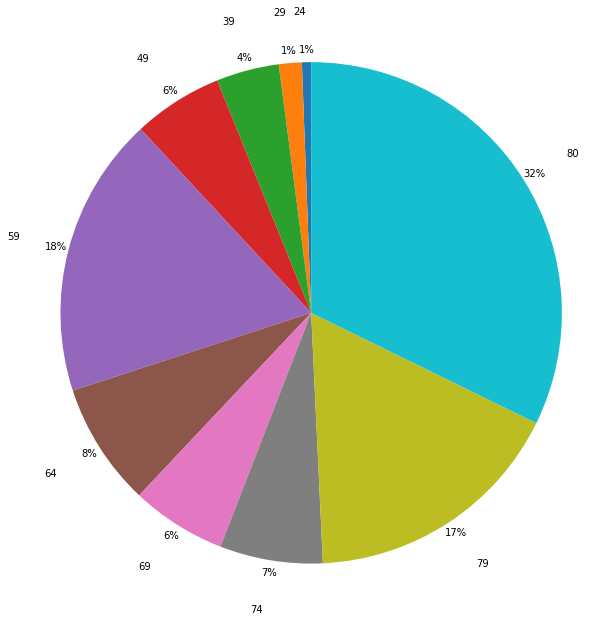

In [246]:
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=None, labels=labels, autopct='%1.f%%' , pctdistance= 1.05 , 
        shadow=False,labeldistance=1.2, startangle=90, radius=1)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#Aggrandir le graphique
fig = plt.gcf()
fig.set_size_inches(10,10)

